# Data import and Visualization

In [28]:
import pandas as pd
import numpy as np
import seaborn as sn

In [29]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


<AxesSubplot:xlabel='Species', ylabel='count'>

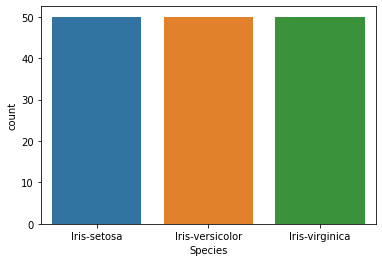

In [49]:
sn.countplot(x = 'Species', data= df)

In [32]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

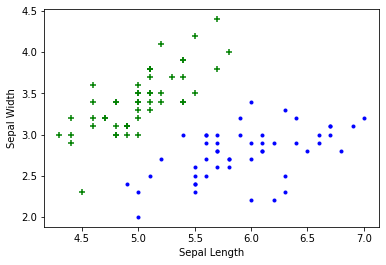

In [55]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'], color = 'green', marker = '+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color = 'blue', marker = '.')

In [37]:
# import math
# def euclideanDistance(instance1, instance2, length):
#     distance = 0
#     for x in range(length):
#         distance += pow((instance1[x] - instance2[x]), 2)
#     return math.sqrt(distance)

In [38]:
# data1 = [2,2,2,'a']
# data2 = [4,4,4,'b']
# distance = euclideanDistance(data1, data2, 3)
# print ('Distance: ' + repr(distance))

# Traininga and Testing Data

In [56]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop(['class','Species'], axis = 1)
y = df['class']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
len(X_train)

120

In [65]:
len(X_test)

30

# Creating KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
knn.score(X_test, y_test)

0.9666666666666667

In [69]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

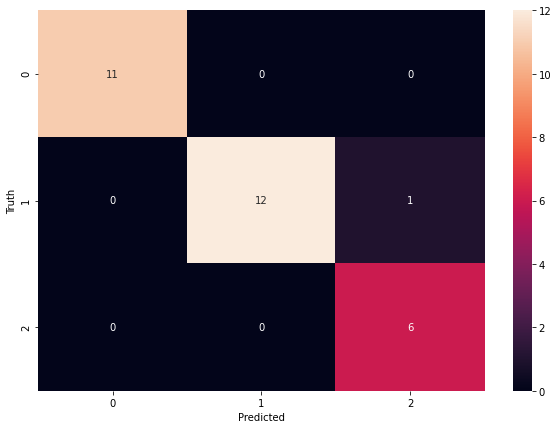

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

